Project Submitted by: Antony Alder George
#The Sparks Foundation

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
#Reading dataset

#Reading news data
dfn = pd.read_csv("india-news-headlines.csv")

#Reading historic data
dfh = pd.read_csv('BSE_train.csv')


In [3]:
dfn.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
#Reading and Visualizing historic Stock prices

In [5]:
dfh.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300
1,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400
2,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500
3,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200
4,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500


In [6]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       220 non-null    object 
 1   Open       220 non-null    float64
 2   High       220 non-null    float64
 3   Low        220 non-null    float64
 4   Close      220 non-null    float64
 5   Adj Close  220 non-null    float64
 6   Volume     220 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ KB


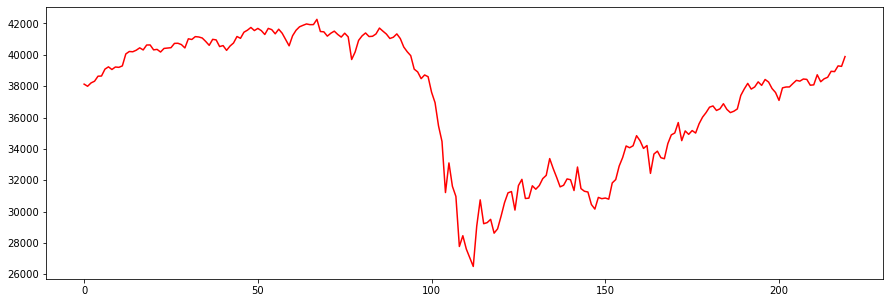

In [7]:
#Plotting the growth of SENSEX for the given period of time
dfh['Open'].plot(figsize=(15,5), color='red')

In [8]:
# 7 days rolling mean
dfh.rolling(7).mean().tail(5)

,Open,High,Low,Close,Adj Close,Volume
215,38449.415737,38623.604353,38305.626674,38498.851005,38498.851005,17757.142857
216,38573.431362,38765.343192,38452.905134,38645.013951,38645.013951,17028.571429
217,38746.121652,38873.307478,38593.609375,38728.606585,38728.606585,17157.142857
218,38822.777344,38986.316964,38691.378348,38850.395089,38850.395089,18542.857143
219,39051.955916,39215.991629,38725.679688,38908.666295,38908.666295,20271.428571


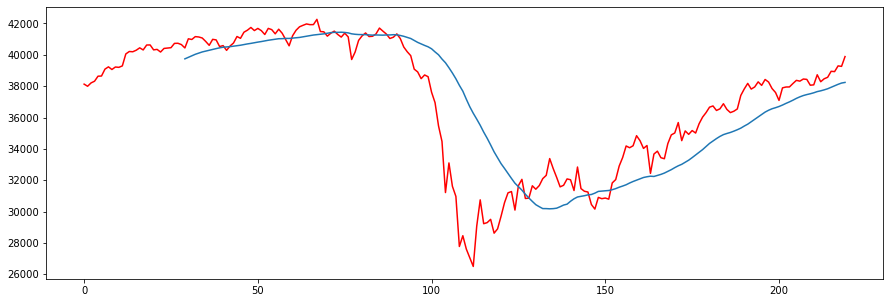

In [9]:
#Plotting rolling mean
dfh['Open'].plot(figsize=(15,5), color='red')
dfh.rolling(window=30).mean()['Close'].plot()

In [10]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [11]:
dfn.rename(columns={'publish_date': 'Date'}, inplace=True)

In [12]:
dfn["Date"] = dfh["Date"].astype(str) #(self note-converting as object will cause problem when merging)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               object
 1   headline_category  object
 2   headline_text      object
dtypes: object(3)
memory usage: 75.5+ MB


In [13]:
#Merging the dataset on the 'date' field
merge = dfn.merge(dfh, how='inner', on='Date', left_index=True)
merge.head(5)

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume
0,2019-10-10,sports.wwe,win over cena satisfying but defeating underta...,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300
1,2019-10-11,unknown,Status quo will not be disturbed at Ayodhya; s...,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400
2,2019-10-14,unknown,Fissures in Hurriyat over Pak visit,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500
3,2019-10-15,unknown,America's unwanted heading for India?,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200
4,2019-10-16,unknown,For bigwigs; it is destination Goa,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500


In [14]:
#Creating a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Creating a function to get polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [15]:
#Create two new columns
merge['Subjectivity'] = merge['headline_text'].apply(getSubjectivity)
merge['Polarity'] = merge['headline_text'].apply(getPolarity)

In [16]:
merge.head(5)

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity
0,2019-10-10,sports.wwe,win over cena satisfying but defeating underta...,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300,0.633333,0.433333
1,2019-10-11,unknown,Status quo will not be disturbed at Ayodhya; s...,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400,0.000000,0.000000
2,2019-10-14,unknown,Fissures in Hurriyat over Pak visit,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500,0.000000,0.000000
3,2019-10-15,unknown,America's unwanted heading for India?,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200,0.000000,0.000000
4,2019-10-16,unknown,For bigwigs; it is destination Goa,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500,0.000000,0.000000


In [17]:
#Creating a function to get sentiment scores

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [18]:
#Get the sentiment scores for each day
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(merge['headline_text'])):
    SIA = getSIA(merge['headline_text'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [19]:
#Storing the sentiment data in merge dataset
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos


In [20]:
merge.head(5)

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-10-10,sports.wwe,win over cena satisfying but defeating underta...,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2019-10-11,unknown,Status quo will not be disturbed at Ayodhya; s...,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2019-10-14,unknown,Fissures in Hurriyat over Pak visit,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2019-10-15,unknown,America's unwanted heading for India?,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2019-10-16,unknown,For bigwigs; it is destination Goa,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [21]:
merge['Price_Up'] = np.where(merge['Close'].shift(-1) > merge['Close'] , 1 ,0)
merge.head(5)

,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Price_Up
0,2019-10-10,sports.wwe,win over cena satisfying but defeating underta...,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300,0.633333,0.433333,-0.0000,0.230,0.473,0.297,1
1,2019-10-11,unknown,Status quo will not be disturbed at Ayodhya; s...,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400,0.000000,0.000000,0.2924,0.000,0.805,0.195,1
2,2019-10-14,unknown,Fissures in Hurriyat over Pak visit,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500,0.000000,0.000000,0.0000,0.000,1.000,0.000,1
3,2019-10-15,unknown,America's unwanted heading for India?,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200,0.000000,0.000000,-0.2263,0.322,0.678,0.000,1
4,2019-10-16,unknown,For bigwigs; it is destination Goa,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500,0.000000,0.000000,0.0000,0.000,1.000,0.000,1


In [22]:
df = merge.drop(columns = ['Date', 'headline_category', 'headline_text'])
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Price_Up
0,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300,0.633333,0.433333,-0.0000,0.230,0.473,0.297,1
1,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400,0.000000,0.000000,0.2924,0.000,0.805,0.195,1
2,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500,0.000000,0.000000,0.0000,0.000,1.000,0.000,1
3,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200,0.000000,0.000000,-0.2263,0.322,0.678,0.000,1
4,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500,0.000000,0.000000,0.0000,0.000,1.000,0.000,1


In [23]:
#Create the feature dataset
X = df
X = np.array(X.drop(['Price_Up'], 1))

#Create the target dataset
y = np.array(df['Price_Up'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
#Create and train the model
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [26]:
#Show the model prediction
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [27]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [28]:
#Show the model metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        21
           1       0.62      0.87      0.73        23

    accuracy                           0.66        44
   macro avg       0.69      0.65      0.64        44
weighted avg       0.68      0.66      0.64        44

